<a href="https://colab.research.google.com/github/adityajain2407/aj-biz-cases/blob/main/aj_ref_aerofit_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("aerofit.csv")

In [5]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [6]:
df.shape

(180, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [9]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [10]:
#bivariate

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Education', ylabel='Income'>

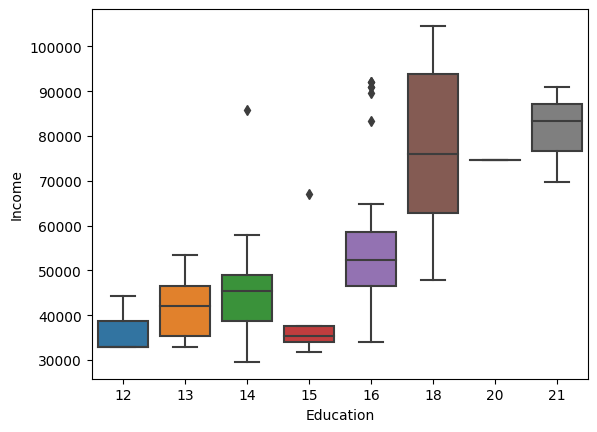

In [12]:
sns.boxplot(x = "Education", y="Income", data = df)

<Axes: xlabel='Gender', ylabel='Income'>

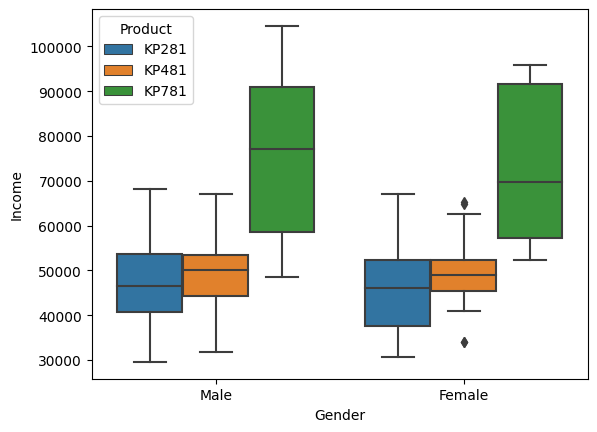

In [13]:
sns.boxplot(x = "Gender", y="Income", hue = "Product", data = df)

In [14]:
#Do the similar analysis for age groups, miles , useage

<Axes: xlabel='Miles', ylabel='Income'>

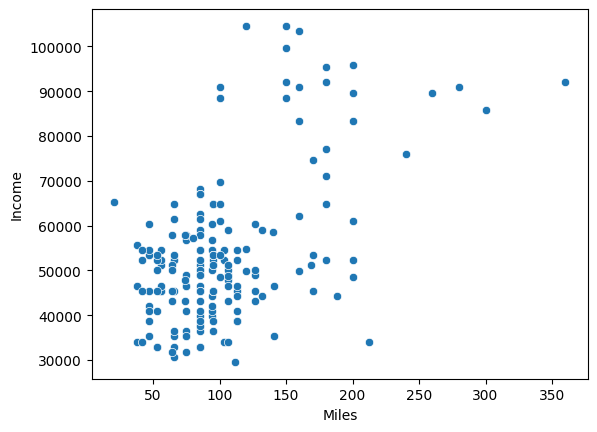

In [15]:
sns.scatterplot(x = "Miles" , y = "Income", data = df)

<Axes: xlabel='Miles', ylabel='Income'>

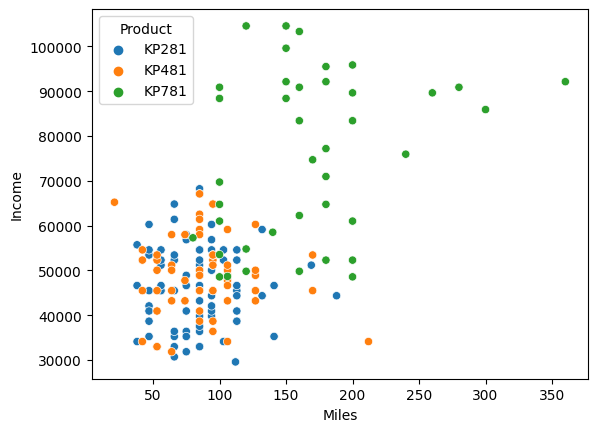

In [16]:
sns.scatterplot(x = "Miles" , y = "Income", hue = "Product", data = df)

<Axes: xlabel='Usage', ylabel='Miles'>

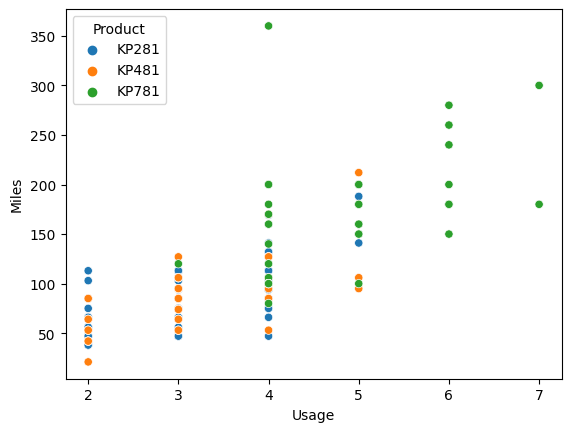

In [17]:
sns.scatterplot(x = "Usage" , y = "Miles", hue = "Product", data = df)

In [18]:
#can checkout other insights and note them down

<ipython-input-19-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

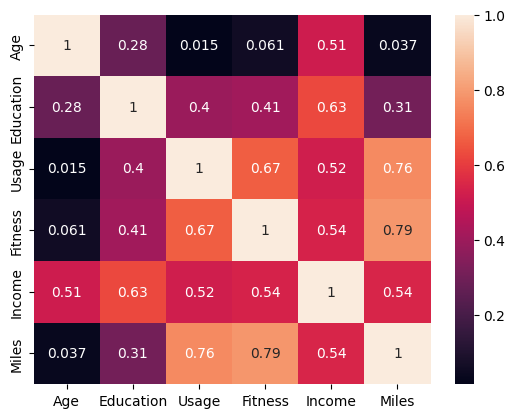

In [19]:
sns.heatmap(df.corr(), annot = True)

In [20]:
#insights around positive and negative correlation

In [21]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [22]:
df['Gender'].value_counts(normalize = True)*100

Male      57.777778
Female    42.222222
Name: Gender, dtype: float64

In [23]:
df['Product'].value_counts(normalize = True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

In [24]:
df['Usage'].value_counts(normalize = True)*100

3    38.333333
4    28.888889
2    18.333333
5     9.444444
6     3.888889
7     1.111111
Name: Usage, dtype: float64

In [25]:
#conditional and joint probability

In [26]:
pd.crosstab(index = df['Gender'], columns = df['Product'])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [27]:
pd.crosstab(index = df['Gender'], columns = df['Product'], margins = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [28]:
pd.crosstab(index = df['Gender'], columns = df['Product'], normalize = True, margins = True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [29]:
#insgiths--> joint probability
#What is the probability of a female purchasing KP781: 3.8%

In [30]:
'''
normalize
bool, {‘all’, ‘index’, ‘columns’}, or {0,1}, default False
Normalize by dividing all values by the sum of values.

If passed ‘all’ or True, will normalize over all values.

If passed ‘index’ will normalize over each row.

If passed ‘columns’ will normalize over each column.

If margins is True, will also normalize margin values.
'''

'\nnormalize\nbool, {‘all’, ‘index’, ‘columns’}, or {0,1}, default False\nNormalize by dividing all values by the sum of values.\n\nIf passed ‘all’ or True, will normalize over all values.\n\nIf passed ‘index’ will normalize over each row.\n\nIf passed ‘columns’ will normalize over each column.\n\nIf margins is True, will also normalize margin values.\n'

In [31]:
pd.crosstab (index=df['Gender'],columns=df['Product'], margins=True,normalize='index')*100

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


In [32]:
#conditional probability-->
#What is the probability of KP281 being bought given that it is a Male customer--> 38.46%

In [35]:
#extra
pd.crosstab (index=df['Gender'],columns=df['Product'], margins=True,normalize='columns')*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,50.0,48.333333,17.5,42.222222
Male,50.0,51.666667,82.5,57.777778
